# Kitty Classifier Training

Dataset credits:

### Import all the Dependencies

In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Verify TensorFlow GPU Support

In [39]:
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is available


### Import data into tensorflow dataset object

In [40]:
IMAGE_SIZE = 256
TARGET_SIZE = (256, 256)
CHANNELS = 3

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        preprocessing_function=lambda x: tf.image.resize(x, TARGET_SIZE)
)
train_generator = train_datagen.flow_from_directory(
        "dataset/train",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 4880 images belonging to 20 classes.


In [42]:
train_generator.class_indices

{'Abyssinian': 0,
 'American Bobtail': 1,
 'American Curl': 2,
 'American Shorthair': 3,
 'Bengal': 4,
 'Birman': 5,
 'Bombay': 6,
 'British Shorthair': 7,
 'Egyptian Mau': 8,
 'Exotic Shorthair': 9,
 'Maine Coon': 10,
 'Manx': 11,
 'Norwegian Forest': 12,
 'Persian': 13,
 'Ragdoll': 14,
 'Russian Blue': 15,
 'Scottish Fold': 16,
 'Siamese': 17,
 'Sphynx': 18,
 'Turkish Angora': 19}

In [43]:
class_names = list(train_generator.class_indices.keys())
class_names

['Abyssinian',
 'American Bobtail',
 'American Curl',
 'American Shorthair',
 'Bengal',
 'Birman',
 'Bombay',
 'British Shorthair',
 'Egyptian Mau',
 'Exotic Shorthair',
 'Maine Coon',
 'Manx',
 'Norwegian Forest',
 'Persian',
 'Ragdoll',
 'Russian Blue',
 'Scottish Fold',
 'Siamese',
 'Sphynx',
 'Turkish Angora']

In [44]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        preprocessing_function=lambda x: tf.image.resize(x, TARGET_SIZE)
)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        shuffle=True
)

Found 700 images belonging to 20 classes.


In [48]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    preprocessing_function=lambda x: tf.image.resize(x, TARGET_SIZE)
)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        shuffle=True
)

Found 1420 images belonging to 20 classes.


## Building the Model

In [51]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 64)       

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [53]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

### Figure out how many steps per epoch:

Training dataset has 4901 images

In [54]:
4901/32

153.15625

Validation dataset has 721 images

In [55]:
721/32

22.53125

In [56]:
history = model.fit(
    train_generator,
    steps_per_epoch=153,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=23,
    verbose=1,
    epochs=20,
)

Epoch 1/20
153/153 [==============================] - 96s 617ms/step - loss: 95240384.0000 - accuracy: 0.0418 - val_loss: 1348598272.0000 - val_accuracy: 0.0486
Epoch 2/20


2024-01-18 11:40:52.139936: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10505608219983090467
2024-01-18 11:40:52.139960: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15591974560595893057
2024-01-18 11:40:52.141834: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1468683327070822558
2024-01-18 11:40:52.141842: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13637837420314652462


153/153 [==============================] - 88s 573ms/step - loss: 315977105408.0000 - accuracy: 0.0527
Epoch 3/20
153/153 [==============================] - 83s 543ms/step - loss: 23033798459392.0000 - accuracy: 0.0488
Epoch 4/20
 34/153 [=====>........................] - ETA: 1:04 - loss: 129603951656960.0000 - accuracy: 0.0368

KeyboardInterrupt: 

In [24]:
scores = model.evaluate(test_generator)

45/45 [==============================] - 12s 269ms/step - loss: 104251180149999927296.0000 - accuracy: 0.0500


In [25]:
scores

[1.0425118014999993e+20, 0.05000000074505806]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [26]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [27]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 153}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [29]:
type(history.history['loss'])

list

In [30]:
len(history.history['loss'])

20

In [31]:
history.history['loss'][:5] # show loss for first 5 epochs

[211488320.0,
 762513915904.0,
 43492357177344.0,
 699278456520704.0,
 4909943262019584.0]

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
val_acc

[0.05000000074505806]

In [34]:
acc

[0.05163934454321861,
 0.045696720480918884,
 0.054713115096092224,
 0.04959016293287277,
 0.05000000074505806,
 0.0450819656252861,
 0.04959016293287277,
 0.053278688341379166,
 0.050204917788505554,
 0.05163934454321861,
 0.04836065694689751,
 0.04733606427907944,
 0.05040983483195305,
 0.05245901644229889,
 0.048565573990345,
 0.04713114723563194,
 0.050204917788505554,
 0.05000000074505806,
 0.05000000074505806,
 0.05000000074505806]

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

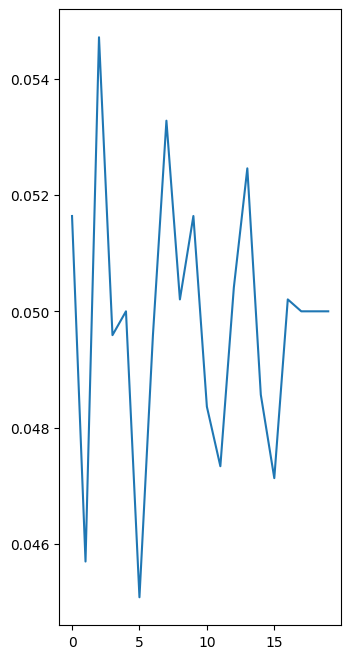

In [35]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

In [ ]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 1s 635ms/step


NameError: name 'np' is not defined

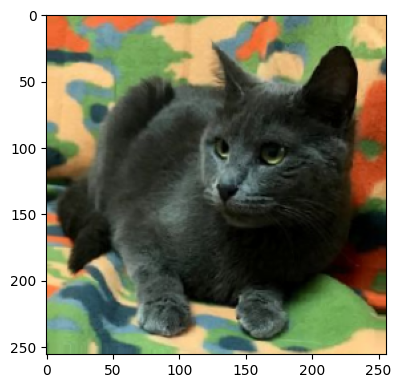

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [ ]:
model.save("../potatoes.h5")